In [29]:
import warnings

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
warnings.filterwarnings('ignore')

# Problem 1
Calculate and compare the expected value and standard deviation of price at time t ($𝑃_t$) , given
each of the 3 types of price returns, assuming $r_t \sim N(0, \sigma^{2})$ . Simulate each return equation
using $r_t \sim N(0, \sigma^{2})$ and show the mean and standard deviation match your expectations.

## Solution
We can calculate the theoretical expected value and standard deviation of $P_{t}$ if $P_{t-1}$ is given as follows:

1. Classical Brownian Motion

$$
\begin{aligned}
E[P_t|P_{t-1}] &= E[P_{t-1} + r_{t} | P_{t-1}]  \\ 
               &= P_{t-1} + E[r_{t}|P_{t-1}] \\
               &= P_{t-1} \\
\end{aligned}  
$$

$$
\begin{aligned}
Std[P_t|P_{t-1}] &= Std[P_{t-1} + r_{t} | P_{t-1}]  \\ 
                 &= Std[r_{t} | P_{t-1}] \\
                 &= \sigma
\end{aligned}
$$

2. Arithmetic

$$
\begin{aligned}
E[P_t|P_{t-1}] &= E[P_{t-1}r_{t}  + P_{t-1} | P_{t-1}]  \\ 
               &= P_{t-1}E[1 + r_{t}|P_{t-1}] \\
               &= P_{t-1} \\
\end{aligned}  
$$

$$
\begin{aligned}
Std[P_t|P_{t-1}] &= Std[P_{t-1}r_{t}  + P_{t-1}| P_{t-1}]  \\ 
                 &= P_{t-1} Std[r_{t} | P_{t-1}] \\
                 &=  P_{t-1}\sigma
\end{aligned}
$$


3. Geometric Brownian Motion
$$
\begin{aligned}
E[ln(P_t)|P_{t-1}] &= E[ln(P_{t-1}e^{r_{t}}) | P_{t-1}]  \\ 
                   &= ln(P_{t-1}) + E[r_{t}|P_{t-1}] \\
                   &= ln(P_{t-1}) \\
\end{aligned}  
$$

$$
\begin{aligned}
Std[P_t|P_{t-1}] &= Std[ln(P_{t-1}) + ln(e^{r_{t}}) | P_{t-1}]  \\ 
                 &= Std[r_{t} | P_{t-1}] \\
                 &= \sigma
\end{aligned}
$$

Therefore, if $P_{t-1}$ is 100, and $r_t \sim N(0, 0.1)$, we would expect to see the expected value and standard deviation of $𝑃_t$ (or $ln(P_t)$) to be:  
1. Classical Brownian Motion  
$$E[P_t|P_{t-1}] = 100$$   
$$Std[P_t|P_{t-1}] = 0.1$$
  

2. Arithmetic  
$$E[P_t|P_{t-1}] = 100$$   
$$Std[P_t|P_{t-1}] = 10$$
  
  
3. Geometric Brownian Motion  
$$E[ln(P_t)|P_{t-1}] = ln(100)$$   
$$Std[ln(P_t)|P_{t-1}] = 0.1$$

The following code block simulates $P_t$'s distribution and calcualtes its mean and standard deviation.

Price 1:
	mean = 100.00
	standard deviation = 0.10
Price 2:
	mean = 99.94
	standard deviation = 9.94
Log of Price 3:
	mean = 4.60, ln(100) = 4.61
	standard deviation = 0.10


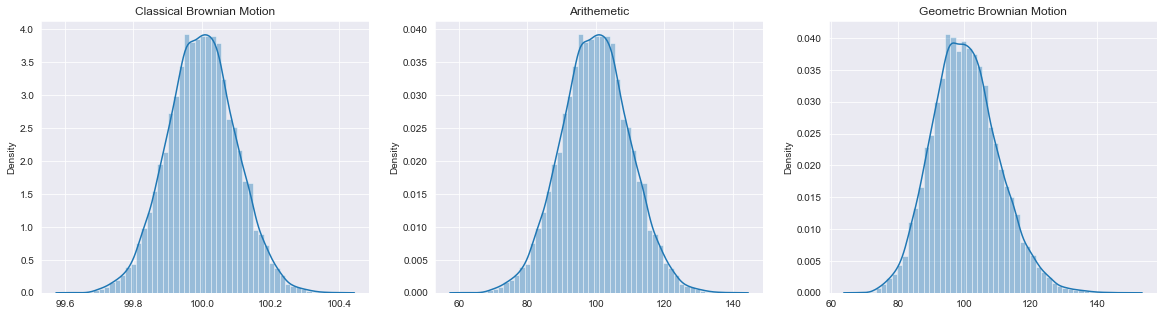

In [30]:
price = 100
nsample = 10000
sigma = 0.1
return_ = scipy.stats.norm(0, sigma).rvs(nsample)

new_price1 = price + return_
new_price2 = price*(1 + return_)
new_price3 = price * np.exp(return_)

new_prices = {
    "Classical Brownian Motion":  new_price1,
    "Arithemetic": new_price2,
    "Geometric Brownian Motion": new_price3
}


fig, axes = plt.subplots(1, 3, figsize=(20, 5))
i = 0
for title, new_price in new_prices.items():
    sns.distplot(new_price, ax=axes[i])
    axes[i].set_title(title)
    i += 1


print("Price 1:")
print(f"\tmean = {np.mean(new_price1):.2f}")
print(f"\tstandard deviation = {np.std(new_price1):.2f}")

print("Price 2:")
print(f"\tmean = {np.mean(new_price2):.2f}")
print(f"\tstandard deviation = {np.std(new_price2):.2f}")

print("Log of Price 3:")
print(f"\tmean = {np.mean(np.log(new_price3)):.2f}, ln(100) = {np.log(100):.2f}")
print(f"\tstandard deviation = {np.std(np.log(new_price3)):.2f}")

# Problem 2

Implement a function similar to the “return_calculate()” in this week’s code. Allow the user to specify the method of return calculation.  
Use DailyPrices.csv. Calculate the arithmetic returns for INTC. Remove the mean from the series so that the mean(INTC)=0  
Calculate VaR
1. Using a normal distribution.
2. Using a normal distribution with an Exponentially Weighted variance (λ = 0. 94)
3. Using a MLE fitted T distribution.
4. Using a Historic Simulation.  
  
Compare the 4 values. Look at the empirical distribution of returns, in sample.
Download from Yahoo! Finance the prices since the end of the data in the CSV file (about 2 weeks). Look the empirical distribution of returns, out of sample.
  
Discuss the ability of these models to describe the risk in this stock.

## Solution
The following code block implements the function to calcualte return, then calculates the arithmetic return for INTC.

In [31]:
def cal_arith_return(prices):
    """
    Compute the arithmetic return given a sequence of prices.
    The prices should be in order from least to most recent.
    """
    price_chg_pct = (prices / prices.shift(1))[1:]
    return price_chg_pct - 1

def cal_log_return(prices):
    """
    Compute the arithmetic return given a sequence of prices.
    The prices should be in order from least to most recent.
    """
    price_chg_pct = (prices / prices.shift(1))[1:]
    return np.log(price_chg_pct)

def cal_return(prices, method='arithmetic'):
    funcs = {
        'arithmetic': cal_arith_return,
        'log': cal_log_return
    }
    return funcs[method](prices)


all_prices = pd.read_csv("DailyPrices.csv", parse_dates=[0], index_col=0)

# calculate the return of Intel, and remove the means
intel_ret = cal_return(all_prices["INTC"], method='arithmetic')
intel_ret -= intel_ret.mean()



Then we calculate VaR using 4 different methods. 

In [32]:
def VaR(simulations: 'array_like', mean='numeric', alpha: float=0.05):
    return mean - np.quantile(simulations, q=alpha)

1. VaR - Historical

In [33]:
# We directly pick out the 5% quantile from the historical returns data
var_hist = VaR(intel_ret, 0)

2. VaR - Normal

In [34]:
# We simulate a normal distribution that has 0 mean and std(r_t) standard deviation
nsample = 10000
std = np.std(intel_ret)
sim_rets_norm = scipy.stats.norm(0, std).rvs(nsample)

var_norm = VaR(sim_rets_norm, 0)

3. VaR - EW Normal

In [35]:
from funcs import cal_ewcov

nsample = 10000
ew_cov = cal_ewcov(np.matrix(intel_ret), 0.94)[0, 0]  # we calculate the standard deviation with exponentially weighting
sim_rets_ewnorm = scipy.stats.norm(0, np.sqrt(ew_cov)).rvs(nsample)

var_ewnorm = VaR(sim_rets_ewnorm, 0)

4. VaR - T

In [36]:
class MLEDistFitter:
    """
    An abstract class to fit the distribution of a random variable x
    using the MLE method.
    
    Users should define the distribution of x in subclasses. 
    """

    @staticmethod
    def ll(dist, x):
        """
        The log likelihood function.
        
        params:
            - dist: distribution of x, a callable object provided by scipy.stats
        """
        return np.log(dist.pdf(x)).sum()
    
    def dist(*args):
        """
        The distribution of x, which is to be determined.
        """
        raise NotImplementedError
    
    def estimate(self, x, x0, constraints=None, **kwargs):
        """Estimate the parameters by maximizing log likelihood function."""
        
        # customize the log-likelihood function and negate it
        def negated_ll(args):
            """
            The negated log likelihood function, so that minimizing it achieves 
            the same effect as maximizing the log likelihood function.
            
            args are passed to self.dist to generate the distribution of x
            """
            dist = self.dist(*args)
            return -self.ll(dist, x)

        all_constraints = getattr(self, 'constraints', {})
        if constraints:
            all_constraints.update(constraints)

        return scipy.optimize.minimize(negated_ll, x0=x0, constraints=all_constraints, **kwargs)
    
    
class TDistFitter(MLEDistFitter):
    """
    Fit the data using a t distribution.
    """
    constraints=({"type":"ineq", "fun":lambda x: x[0]}, # the degree of freedom of t distribution is positive 
                 {"type":"ineq", "fun":lambda x: x[1]}) # the scale parameter is also positive

    def dist(self, df, scale):
        """
        Assume the data follows a T distribution 
        whose degree of freedom is df and is scaled by scale.
        """
        return scipy.stats.t(df=df, scale=scale)


t_fitter = TDistFitter()
df, scale = t_fitter.estimate(intel_ret, x0=(1, 1)).x
sim_rets_t = scipy.stats.t(df=df, scale=scale).rvs(nsample)

var_t = VaR(sim_rets_t, 0)

### Compare the results
The VaR calculated by each method is showed below:

In [37]:
print(f'VaR - Historical = {var_hist*100:.2f}%')
print(f'VaR - Normal = {var_norm*100:.2f}%')
print(f'VaR - EW Normal = {var_ewnorm*100:.2f}%')
print(f'VaR - T = {var_t*100:.2f}%')

VaR - Historical = 2.07%
VaR - Normal = 3.39%
VaR - EW Normal = 5.02%
VaR - T = 2.74%


How well can each method explain the past, and predict the future? We download the quotes of INTC in the next two weeks, and calculcate the returns in these 2 weeks in "future". Then we plot the distribution of historical data and each simulation in the left graph, those of the future data and and each simulation in the right graph.  

We can see that the T simulation is the best to fit the history, but the worst to predict the future. The EW Normal simulation is neither good at explaining the past nor predicting the future. In my opinion, the Normal simulation is just good enough for both objectives.

Text(0.5, 1.0, 'Comparison with Future Data')

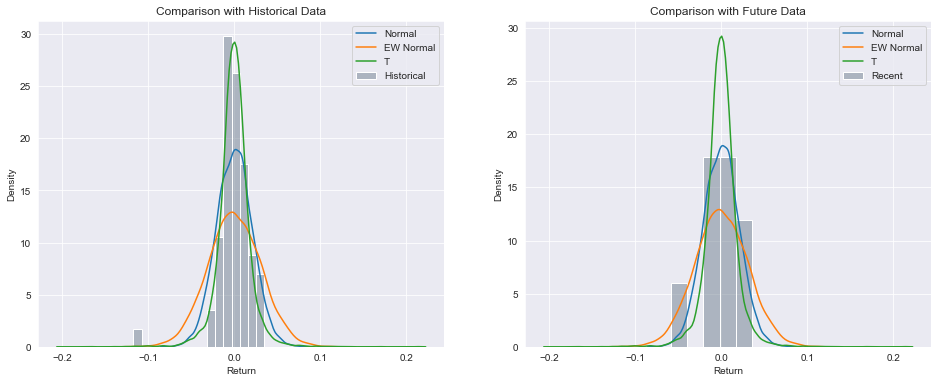

In [38]:
fig, axes = plt.subplots(1, 2,  figsize=(16,6))

# comparison with historical data
ax = axes[0]
sns.histplot(intel_ret, stat='density', ax=ax, label='Historical', color='slategrey', alpha=0.5)
sns.distplot(sim_rets_norm, ax=ax, hist=False, label='Normal')
sns.distplot(sim_rets_ewnorm, ax=ax, hist=False, label='EW Normal')
sns.distplot(sim_rets_t, ax=ax, hist=False, label='T')
ax.legend()
ax.set_xlabel("Return")
ax.set_title("Comparison with Historical Data")


# comparison with future data
# load intel price data from Jan 15 to Jan 31 
intel_future_quote = pd.read_csv("INTC.csv", parse_dates=[0], index_col=[0])
intel_future_ret = cal_arith_return(intel_future_quote['Adj Close'])
intel_future_ret -= np.mean(intel_future_ret)

ax = axes[1]
sns.histplot(intel_future_ret, stat='density', ax=ax, label='Recent', color='slategrey', alpha=0.5)
sns.distplot(sim_rets_norm, ax=ax, hist=False, label='Normal')
sns.distplot(sim_rets_ewnorm, ax=ax, hist=False, label='EW Normal')
sns.distplot(sim_rets_t, ax=ax, hist=False, label='T')
ax.legend()
ax.set_xlabel("Return")
ax.set_title("Comparison with Future Data")

# Problem 3
Using Portfolio.csv and DailyPrices.csv. Assume the expected return on all stocks is 0.  
This file contains the stock holdings of 3 portfolios.   
You own each of these portfolios. Calculate the VaR of each portfolio as well as your total VaR (VaR of the total holdings).  
Discuss your methods, why you chose those methods, and your results.  

## Solution
To facilitate calculation, We can create a Portfolio D that contains all of our holdings.

In [39]:
# load prices, extract the current prices
all_prices = pd.read_csv("DailyPrices.csv", parse_dates=[0], index_col=0)
current_prices = pd.DataFrame({"Price":all_prices.iloc[-1]})

# historical data on return 
rets =  cal_arith_return(all_prices)

# load portfolio 
portfolios = pd.read_csv("Portfolio.csv")

# calculate total holdings on each asset, consider it as portfolio D
total_holdings = portfolios.groupby('Stock').sum('Holding')
total_holdings['Portfolio'] = 'D'
total_holdings = total_holdings.reset_index()
portfolios = portfolios.append(total_holdings)

### Are returns normally distributed?
We start by examining whether the returns of the assets in a portfolio is normally distributed. If they are not, we will not have enough reason to use the Delta Normal VaR method. 

One way to check multivariate normality is to apply the Shapiro-Wilk test to each asset's returns. If the portfolio's returns follow a multivariate normal distribution, then each asset's return are normally distributed. On the other hand, if the return of one asset is not normally distributed, than the returns of the whole portfolio is not likely to follow a multivariate normal distribution.

Another way is to apply Henze-Zirkler multivariate normality test on the whole return matrix. Pinguoin, a third-party library provided one implementation of the H-Z test.  

In [40]:
from funcs import multivariate_normality

def normality(data, alpha=0.05):
    """Examine if data is normally distributed with the Shapiro-Wilk test"""
    test_stat, p = scipy.stats.shapiro(data)
    return True if p >= alpha else False 

for pfl, pfl_df in portfolios.groupby('Portfolio'):
    pfl_rets = rets[pfl_df.Stock]
    
    normal_ratio = pfl_rets.apply(normality).sum() / pfl_rets.shape[1]
    print(f"{normal_ratio*100:.2f}% assets in Portfolio {pfl} have normally distributed returns.")

    hz_test = multivariate_normality(rets)
    print(f"The returns of Portfolio {pfl} are normally distributed: {hz_test.normal}")
    print()

52.78% assets in Portfolio A have normally distributed returns.
The returns of Portfolio A are normally distributed: False

46.88% assets in Portfolio B have normally distributed returns.
The returns of Portfolio B are normally distributed: False

59.38% assets in Portfolio C have normally distributed returns.
The returns of Portfolio C are normally distributed: False

53.00% assets in Portfolio D have normally distributed returns.
The returns of Portfolio D are normally distributed: False



We can see both methods rejects the hypothesis that the returns follow a multivariate normal distribution. I tried to use a MLE fitted multivariate t distribution to simulate the future returns, but it was too complicated and time-costing. In the end, I decided to use the historical data to calculate the VaR of the portfolios. Since the history is only 61 trading-days long, we can use KDE to create a continuous distribution. (It's a pity that scipy only provides the Gaussian kernel.)

The following code block calculates the VaR value of each portfolio, and displays the distribution of simulated portfolio value using historical data and the KDE-smoothed distribution.

Historical Var of Portfolio A: 5329.25
Historical Var (KDE) of Portfolio A: 6364.90

Historical Var of Portfolio B: 5579.83
Historical Var (KDE) of Portfolio B: 5730.95

Historical Var of Portfolio C: 3320.22
Historical Var (KDE) of Portfolio C: 3986.19

Historical Var of Portfolio D: 12593.87
Historical Var (KDE) of Portfolio D: 15427.42



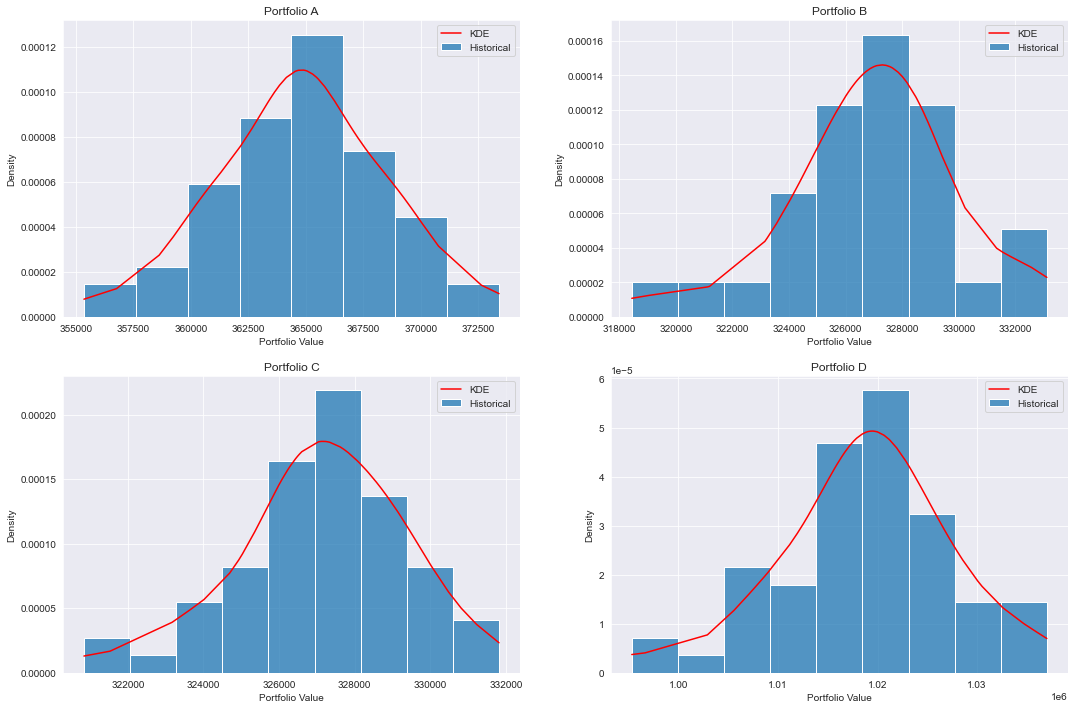

In [41]:
def VaR_kde(simulations:'array_like', mean:'numeric', alpha=0.05, *args, **kwargs):
    """
    Calculate the Var based on a sequence of simulations. 
    Smooth the distribution of the simulations using Gaussian KDE.
    """
    kde = scipy.stats.gaussian_kde(simulations, *args, **kwargs)
    def quantile(upper_bound):
        return kde.integrate_box(0, upper_bound) - alpha
    return mean - scipy.optimize.fsolve(quantile, x0=mean)[0]


def plot_pfl_value_distribution(data, ax, pfl):
    kde = scipy.stats.gaussian_kde(data)
    sns.histplot(data, stat='density', ax=ax, label='Historical')
    sns.lineplot(data, kde.pdf(sim_values), ax=ax, color='r', label='KDE')
    ax.set_title(f"Portfolio {pfl}")
    ax.set_xlabel("Portfolio Value")
    ax.legend()


i = 0
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
for pfl, pfl_df in portfolios.groupby('Portfolio'):
    portfolio = pfl_df.set_index('Stock')
    portfolio = portfolio.join(current_prices.loc[portfolio.index])

    # calculate the value and weight of each asset
    portfolio['Value'] = portfolio['Holding'] * portfolio['Price']
    portfolio['Weight'] = portfolio['Value'] / portfolio['Value'].sum()
    present_value = portfolio['Value'].sum()

    # Historical VaR
    sim_prices = (1 + rets[portfolio.index]) * portfolio['Price'].T
    sim_values = sim_prices @ portfolio['Holding']
    print(f"Historical Var of Portfolio {pfl}: {VaR(sim_values, present_value):.2f}")

    # Historical Var (Smoothed by KDE)
    print(f"Historical Var (KDE) of Portfolio {pfl}: {VaR_kde(sim_values, present_value):.2f}")
    print()
    
    # plot the distribution of historical return and kde's pdf
    ax = axes[i//2][i%2]
    plot_pfl_value_distribution(sim_values, ax, pfl)
    i += 1